# 11. Information Extraction

## 11. 1 Key Phrase extraction
Generate candidate phrase & rank them. It is a initial step to create a taxonomy / thesaurus.

**Generation of candidate phrase**: 
* Remove stop words
* Remove verb/ preposition with POS tagging
* N-gram of the rest of the text

**Rank them**
* tf-idf
* use of syntactic features (title, subtitle)
* use of external resources (wiki) to check if phrase = concept


## 11. 2 Name Entity Recognition (NER)
Find & classify names of people / organization/ place in document.

Used in : Index / Sentiment extraction

How: As a sequence labelling taks = CLASSIFICATION!

Classifier: Naive Bayes, HMM

Features:
* Neighborword
* Pos Tags: POS(Lausanne) = NN
* Prefix, Suffix: Prefix(Lausanne, 3) = Lau
* Word Shape : WS(Lausanne): Xxxxxxxx

**Hidden Markov Model**:
* States = POS tags
* Alphabets = words
* Transition probabilities: P(N|V)
* Initial Probabilities: P_i (Verb)
* Emission Probabilities: P(Lausanne| N) = #occurence of word lablled as tag / #occurence of tag

* Maximization for word: argmax_tag = P(tag | word) = argmax_tag P(tag) * P(word| tag)

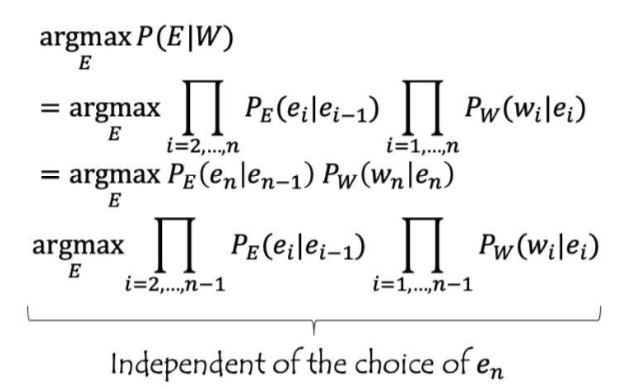

*Viterbi algorithm* (p. 25-26)


## 11.3 Information Extraction (IE)

**Goal: Extract statement from text to create knowledge graphs**

### 11.3.1 HandWritten Patterns (Hearst)
* Regex
* ex. Patterns of ISA: "Y such as X", "Y, X", "Y or X"
* Highly precise, low recall
* Tailored for specific domains, Impossible to find all possible patterns


### 11.3.2 Supervised learning 
2 classifiers: 
* 1 for filtering: exist relationship in statement?
* 1 for recognition: which type of relationship is it?

Training:
1. Extract all entity pairs with NER
2. Not annotated pair = negative sampling

Features for mention (M1, M2)
1. Bag of words
2. Head words
3. WOrd in specific position
4. Stems
5. POS tagging


### 11.3.3 Bootstrapping

No training data, only highly precise patterns

How:

1. Find entity paris matching the pattern
2. Find sentences with the entity pair
3. Generalize entity in these sentences
4. New patterns
4.1 **To avoid semantic shift (no context), we use a confidence measure to measure the confidence in the newly finded pair**

Ex. 
1) Pattern = LOC is located in LOC
2) Mumbai is located in India
3) (Mumbai, India) search => Mumbai is India's top destination
4) LOC is LOC's top destination

*Confidence*: Given M = set of correct mentions
* Hits = # CORRECT pairs (in M) a new pattern match
* Finds = total # pairs a new pattern match

Conf(p) = Hits_p / Finds_p * log(Finds_p)

### 11.3.4 Distant supervision

Use existing knowledge base to collect training data from which a classifier can be trained
> Bootstrapping + Supervised ML


How?
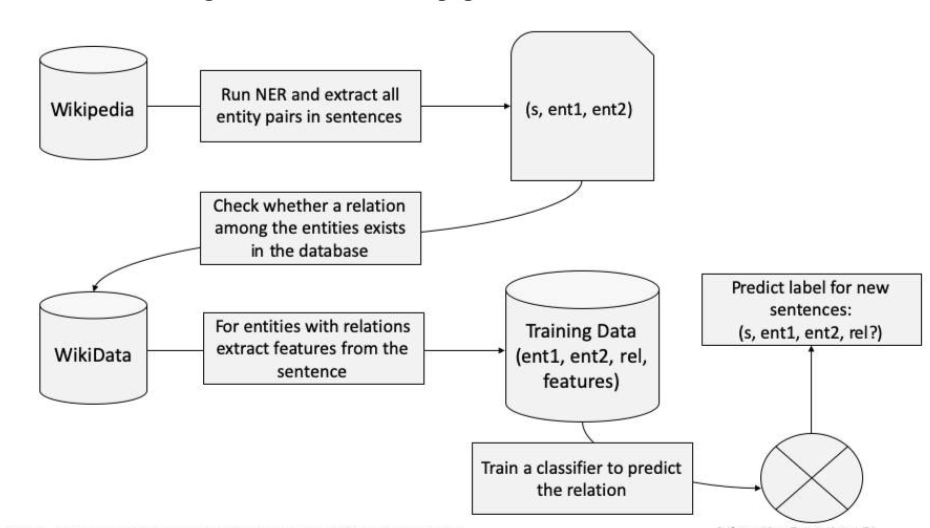


Features:
* Conjunction of standard IE supervised learning ^
>1. Bag of words

>2. Head words

>3. WOrd in specific position

>4. Stems

>5. POS tagging
* match if all individual features match

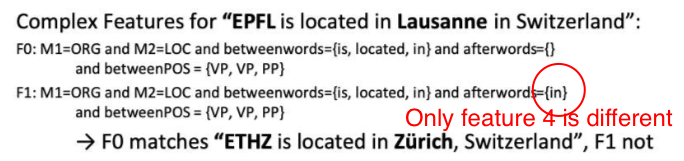

### 11.3.5 Matrix Factorization

* Row : (M1, M2) entity pairs
* Columns: Relationships : X is a professor at Y

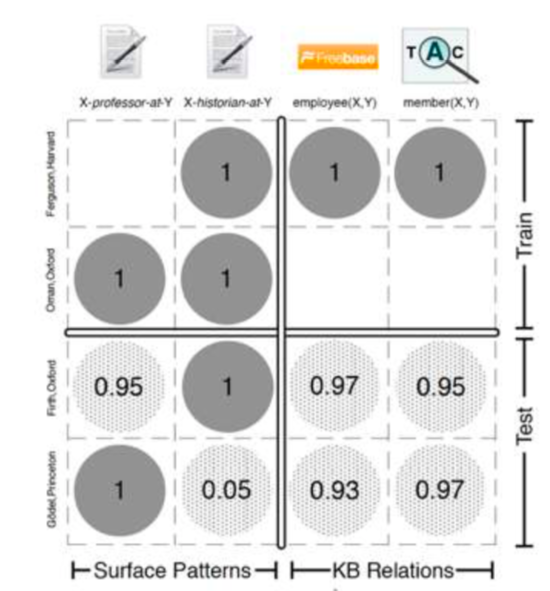

**Learning**:

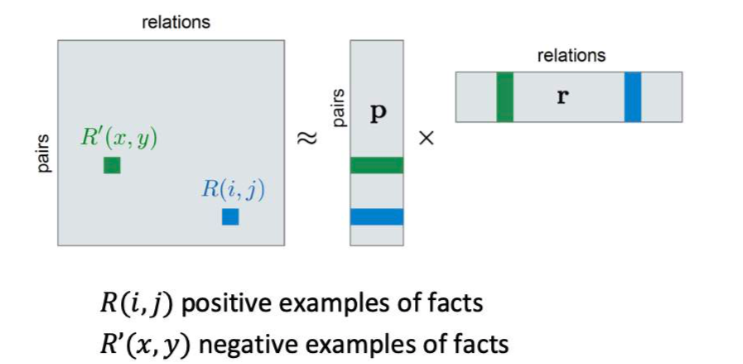

**Since not observing (X, Y) with relationship "X is... Y" doesn't mean that this relationship is wrong, we need to maintain a ranking of observed pairs - unobserved pairs (observed pairs with higher probability)**

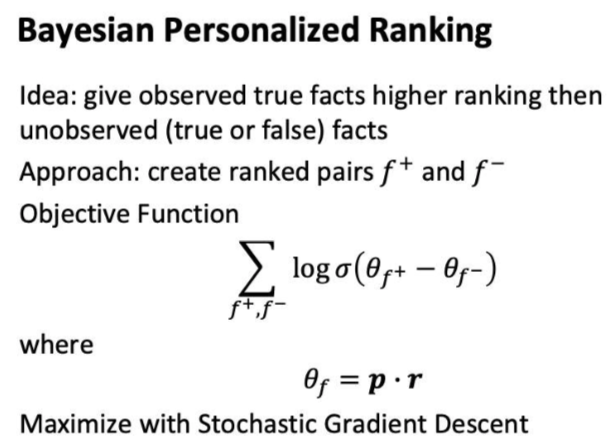